In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split




In [16]:
data=pd.read_csv("C:\\Users\\adars\\Downloads\\student_extended_ml_dataset2.csv")

In [5]:
data.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [6]:
data.tail()
#size:5000 values

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High
4999,Christine Rodriguez,38,Male,1.627111,95,52,70,74,True,Low


In [7]:
data.nunique()

Name                 4824
Age                    28
Gender                  2
Hours_Studied        5000
IQ                     71
Physics_Marks          61
Math_Marks             61
Chemistry_Marks        61
Has_Part_Time_Job       2
Study_Hours_Group       2
dtype: int64

In [12]:
data.columns

Index(['Name', 'Age', 'Gender', 'Hours_Studied', 'IQ', 'Physics_Marks',
       'Math_Marks', 'Chemistry_Marks', 'Has_Part_Time_Job',
       'Study_Hours_Group'],
      dtype='object')

In [11]:
data.isnull().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

In [15]:
description = data[['IQ', 'Physics_Marks']].describe()
print(description)

                IQ  Physics_Marks
count  5000.000000    5000.000000
mean    114.915200      70.311000
std      20.551839      17.753538
min      80.000000      40.000000
25%      97.000000      55.000000
50%     115.000000      71.000000
75%     133.000000      86.000000
max     150.000000     100.000000


In [19]:
data['Total_Marks']=data['Physics_Marks']+data['Chemistry_Marks']+data['Math_Marks']
#adding extra column-'Total_Marks'

In [36]:
data.head()


,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Total_Marks
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,215
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,221
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,196
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,239
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,226


In [42]:
data['Has_Part_Time_Job'] = data['Has_Part_Time_Job'].map({True: 1, False: 0})

In [46]:
data.head()
#CONVERTS BOOLEAN VARIABLE 'Has_Part_Time_Job' to BINARY VALUES

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Total_Marks
0,Jason Vargas,19,Male,8.140821,92,87,43,85,1,High,215
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,0,High,221
2,Julia Olsen,33,Male,8.835372,131,87,52,57,1,High,196
3,Robert Pennington,33,Male,2.482483,138,70,86,83,0,Low,239
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,1,Low,226


In [39]:
#juz removing non-numeric values to make it compatible for Heatmap 
student = data.drop(['Name', 'Gender', 'Study_Hours_Group'], axis=1)

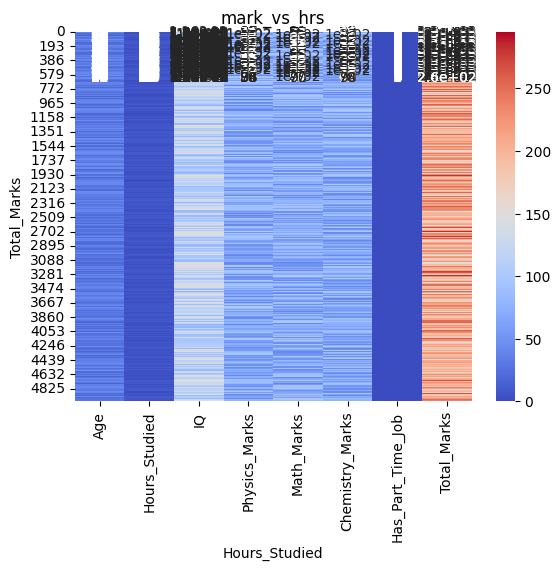

In [40]:
 sns.heatmap(student, annot=True, cmap='coolwarm')
plt.xlabel('Hours_Studied')
plt.ylabel('Total_Marks')
plt.title('mark_vs_hrs')

#display the heatmap
plt.show()

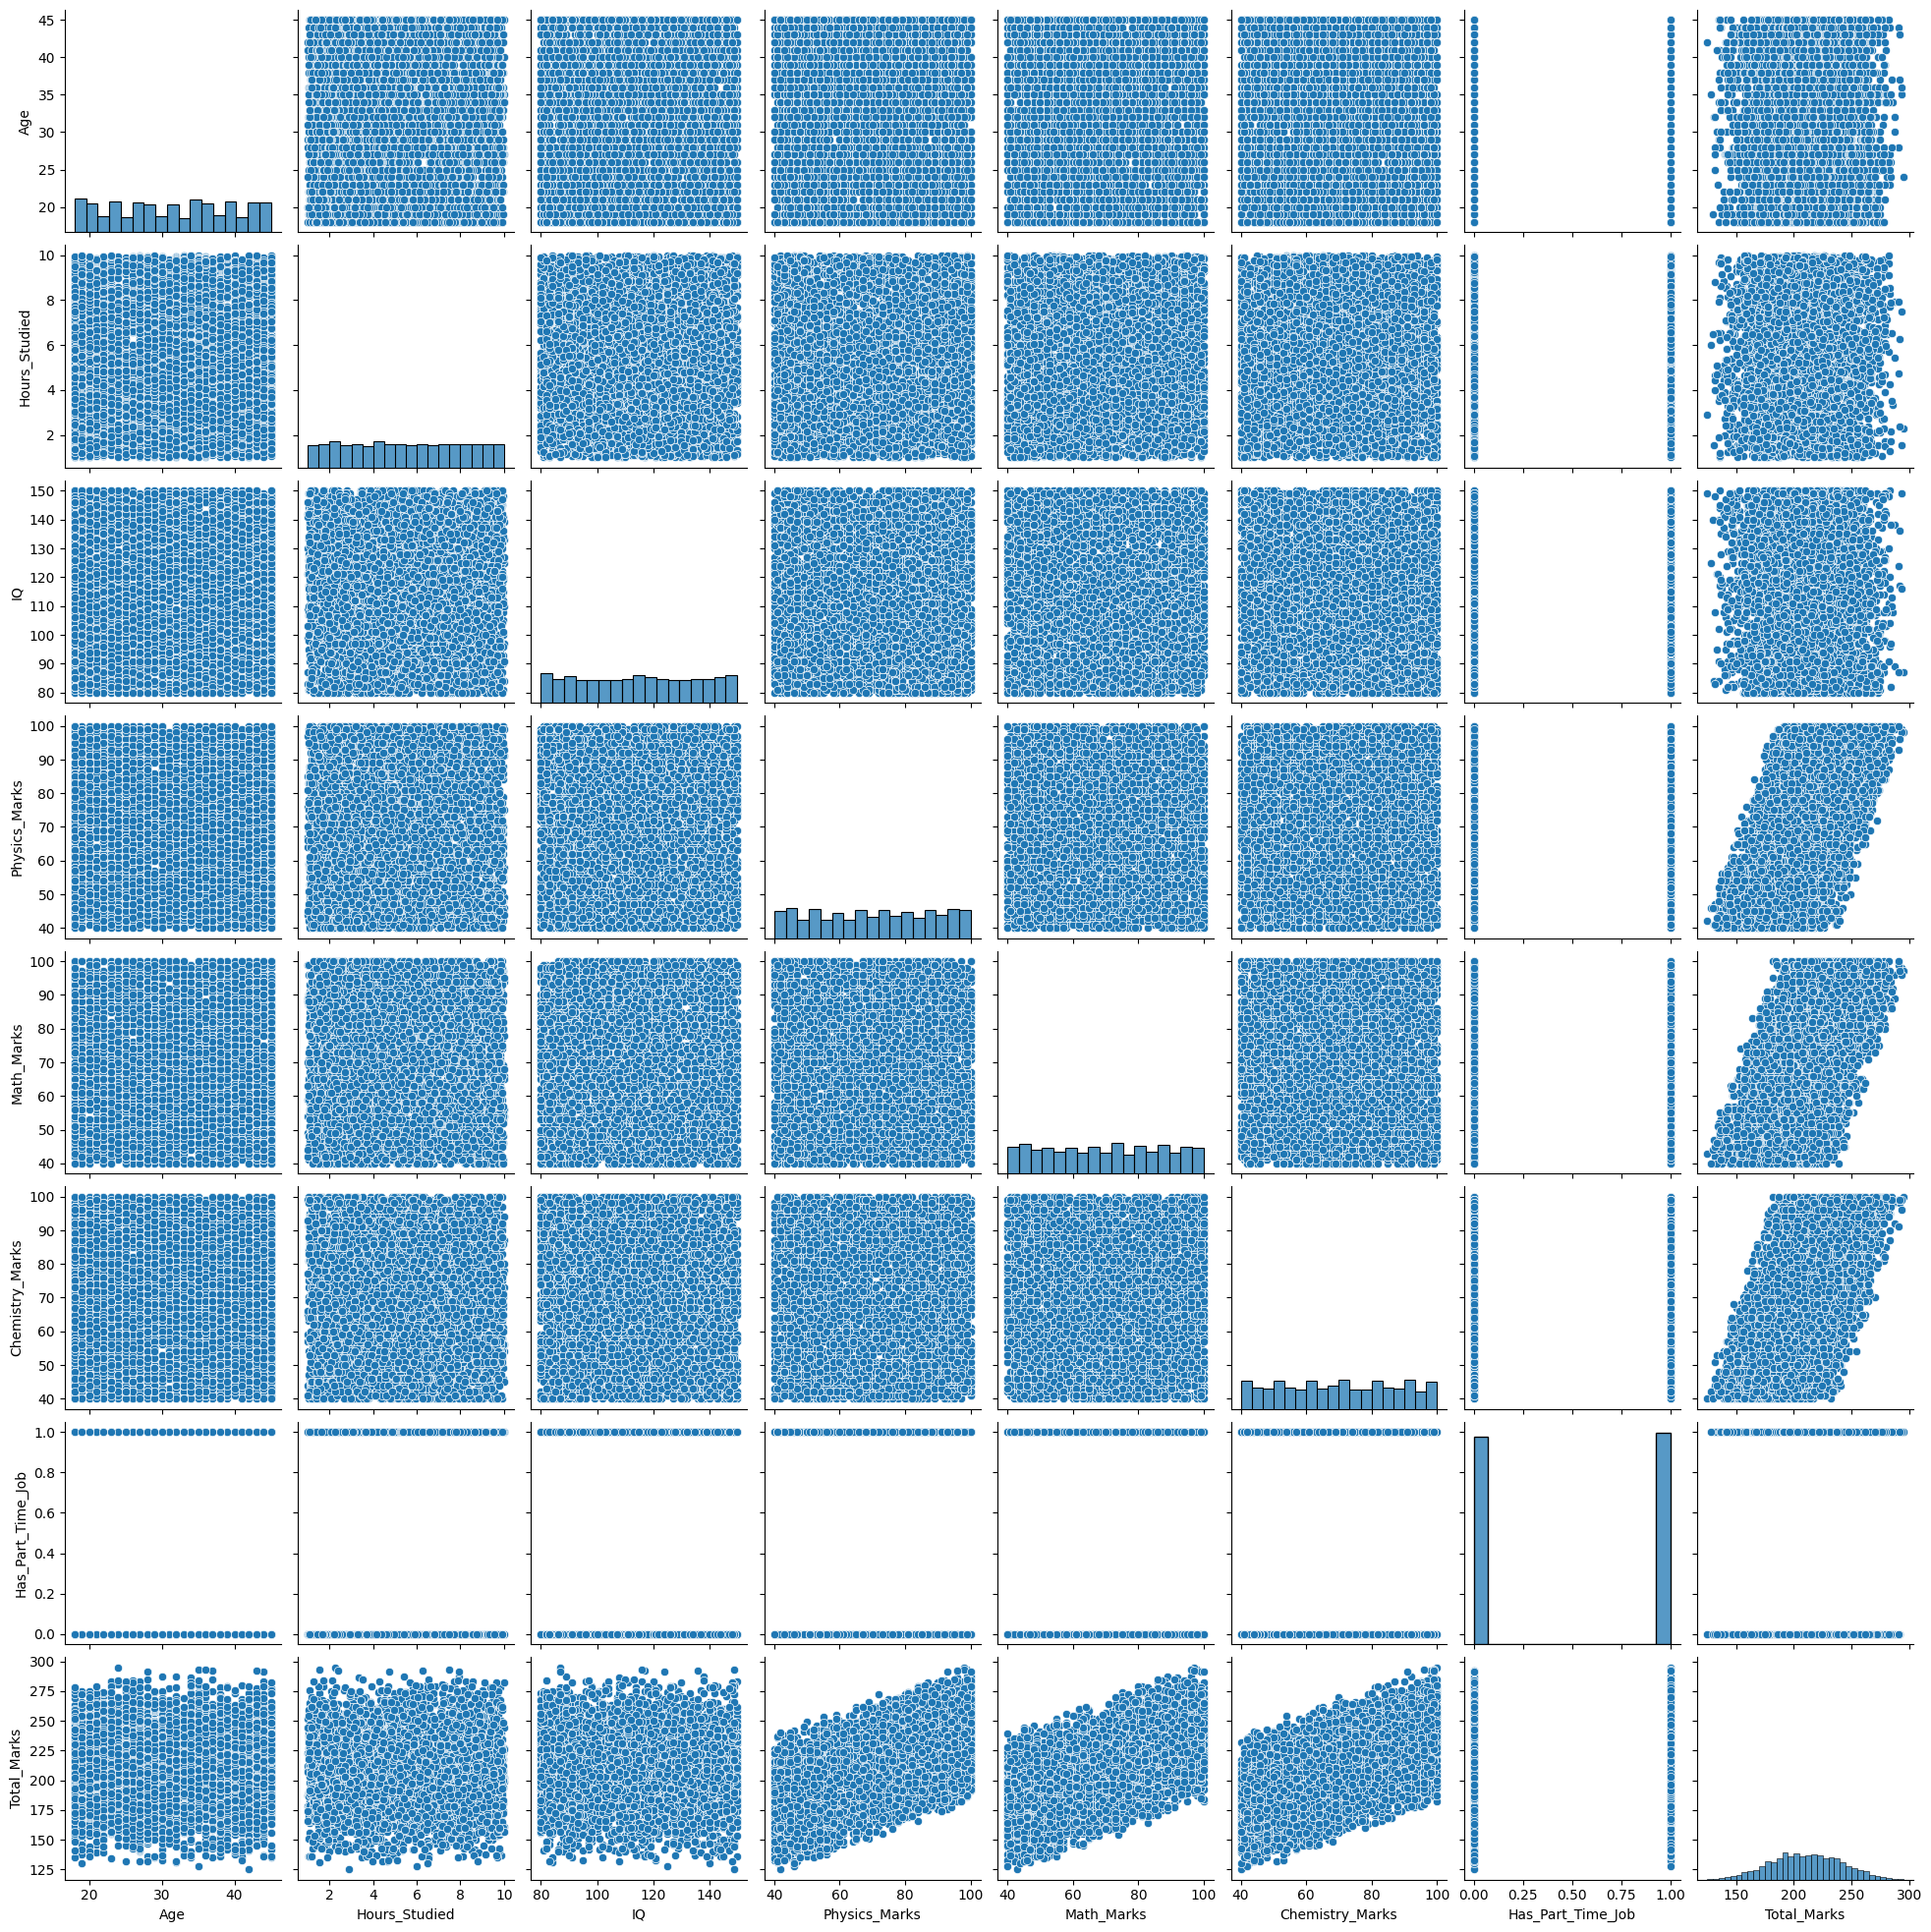

In [41]:
sns.pairplot(student)

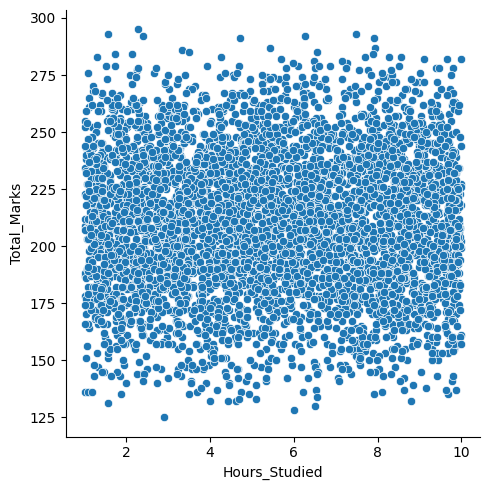

In [32]:
sns.relplot(x='Hours_Studied', y='Total_Marks', data=student)
#We cannot find any plausible inferences from this,let's try other ways and variables to examine

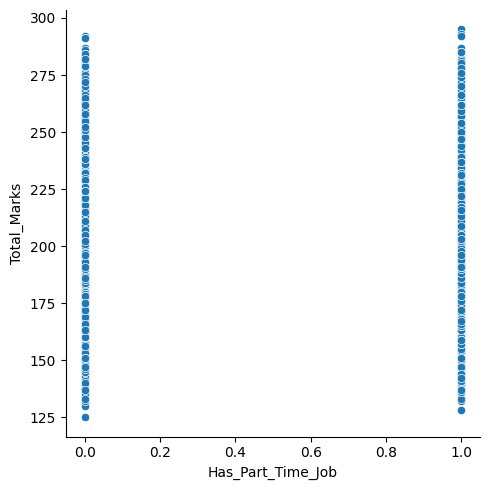

In [47]:
sns.relplot(x='Has_Part_Time_Job', y='Total_Marks', data=student)

Slope (Coefficient): -0.032488041184870295
Intercept: 213.65916975036762


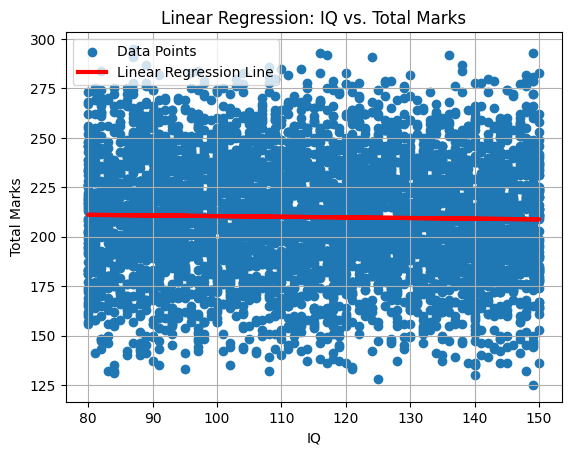

In [64]:


# Extract the independent variable (X) and dependent variable (y)
X = data[['IQ']]
y = data['Total_Marks']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the model parameters
slope = model.coef_[0]
intercept = model.intercept_

# Predict the Total_Marks values using the model
predicted_total_marks = model.predict(X)

# Create a scatter plot of IQ vs. Total_Marks
plt.scatter(X, y, label='Data Points')
plt.plot(X, predicted_total_marks, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel('IQ')
plt.ylabel('Total Marks')
plt.title('Linear Regression: IQ vs. Total Marks')
plt.legend()
plt.grid(True)

# Print the model parameters
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

# Show the plot
plt.show()


Slope (Coefficient): 0.00043799751018865703
Intercept: 69.78520395706113


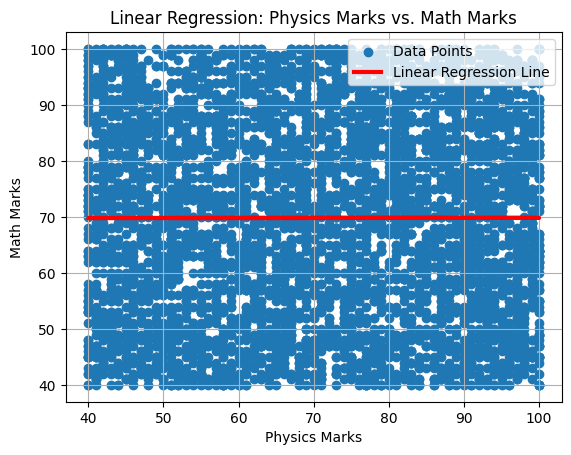

In [69]:
X = data[['Physics_Marks']]
y = data['Math_Marks']


model = LinearRegression()


model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

predicted_math_marks = model.predict(X)

# Create a scatter plot of Physics_Marks vs. Math_Marks
plt.scatter(X, y, label='Data Points')
plt.plot(X, predicted_math_marks, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel('Physics Marks')
plt.ylabel('Math Marks')
plt.title('Linear Regression: Physics Marks vs. Math Marks')
plt.legend()
plt.grid(True)

print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')


plt.show()


Slope (Coefficient): 0.027681962388839597
Intercept: 209.77356917800302


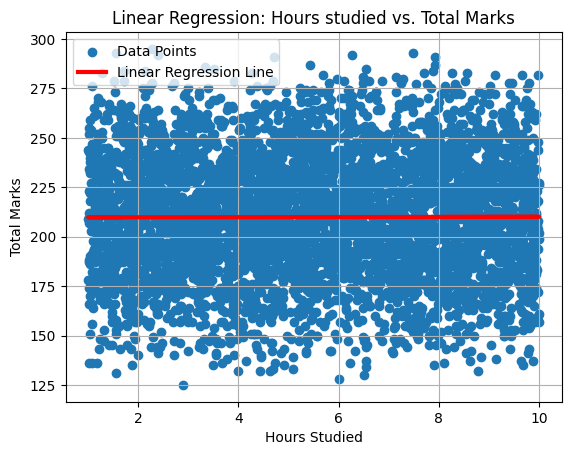

In [70]:
X = data[['Hours_Studied']]
y = data['Total_Marks']


model = LinearRegression()

model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_


predicted_math_marks = model.predict(X)

#SCatter plot Hours_Studied vs Tot_marks
plt.scatter(X, y, label='Data Points')
plt.plot(X, predicted_math_marks, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Total Marks')
plt.title('Linear Regression: Hours studied vs. Total Marks')
plt.legend()
plt.grid(True)


print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

# Show the plot
plt.show()


In [71]:
import pandas as pd



# Calculate the median for 'Total_Marks' across the entire dataset
median_total_marks = data['Total_Marks'].median()

# Filter the data where 'Has_Part_Time_Job' is False
no_part_time_job_data = data[data['Has_Part_Time_Job'] == False]

# Calculate the mean of 'Total_Marks' for this filtered subset
mean_total_marks_no_part_time_job = no_part_time_job_data['Total_Marks'].mean()

# Check if 'Total_Marks' is above the calculated median for students without part-time jobs
above_median = mean_total_marks_no_part_time_job > median_total_marks

# Print the results
print(f'Median Total Marks: {median_total_marks}')
print(f'Mean Total Marks for No Part-Time Job: {mean_total_marks_no_part_time_job}')
print(f'Is Mean Total Marks for No Part-Time Job above Median: {above_median}')


Median Total Marks: 210.0
Mean Total Marks for No Part-Time Job: 209.84727272727272
Is Mean Total Marks for No Part-Time Job above Median: False


In [72]:
#No satisfactory inferences from data.
#Tried analyzing various factors; univariate, multivariate analysis with help of Scatter plots, heatmaps.
#Linear Regression model was used to look for trend between few bivariate data.